# **AI TRAVEL PLANNER FOR STUDENTS**

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("ai_travel_dataset.xlsx")
df.head()

,Age,Gender,Budget,Interest_1,Interest_2,Rating,Spot,State
0,25,M,1200.0,Beach,Adventure,4.5,Arambol Beach,Goa
1,30,F,1500.0,Beach,Adventure,4.3,Anjuna Beach,Goa
2,28,M,1000.0,Beach,Adventure,4.2,Vagator Beach,Goa
3,26,F,1300.0,Beach,Adventure,4.1,Ashwem Beach,Goa
4,32,M,1400.0,Beach,Adventure,3.8,Baga Beach,Goa


In [ ]:
df.shape
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         488 non-null    int64  
 1   Gender      487 non-null    object 
 2   Budget      487 non-null    float64
 3   Interest_1  487 non-null    object 
 4   Interest_2  487 non-null    object 
 5   Rating      487 non-null    float64
 6   Spot        487 non-null    object 
 7   State       487 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.6+ KB


Index(['Age', 'Gender', 'Budget', 'Interest_1', 'Interest_2', 'Rating', 'Spot',
       'State'],
      dtype='object')

In [ ]:
df.describe()

,Age,Budget,Rating
count,488.000000,487.000000,487.000000
mean,29.293033,1664.065708,3.783162
std,3.045546,341.568489,0.543578
min,7.000000,1000.000000,2.300000
25%,27.000000,1400.000000,3.400000
50%,29.000000,1600.000000,3.800000
75%,31.000000,1900.000000,4.100000
max,36.000000,2500.000000,5.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,1
Budget,1
Interest_1,1
Interest_2,1
Rating,1
Spot,1
State,1


In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Interest_1'] = df['Interest_1'].fillna(df['Interest_1'].mode()[0])
df['Interest_2'] = df['Interest_2'].fillna(df['Interest_2'].mode()[0])
df['Spot'] = df['Spot'].fillna(df['Spot'].mode()[0])
df['State'] = df['State'].fillna(df['State'].mode()[0])
df['Budget'].fillna(df['Budget'].median(), inplace=True)
df['Rating'].fillna(df['Rating'].median(), inplace=True)


/tmp/ipython-input-3100718654.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Budget'].fillna(df['Budget'].median(), inplace=True)
/tmp/ipython-input-3100718654.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Budget,0
Interest_1,0
Interest_2,0
Rating,0
Spot,0
State,0


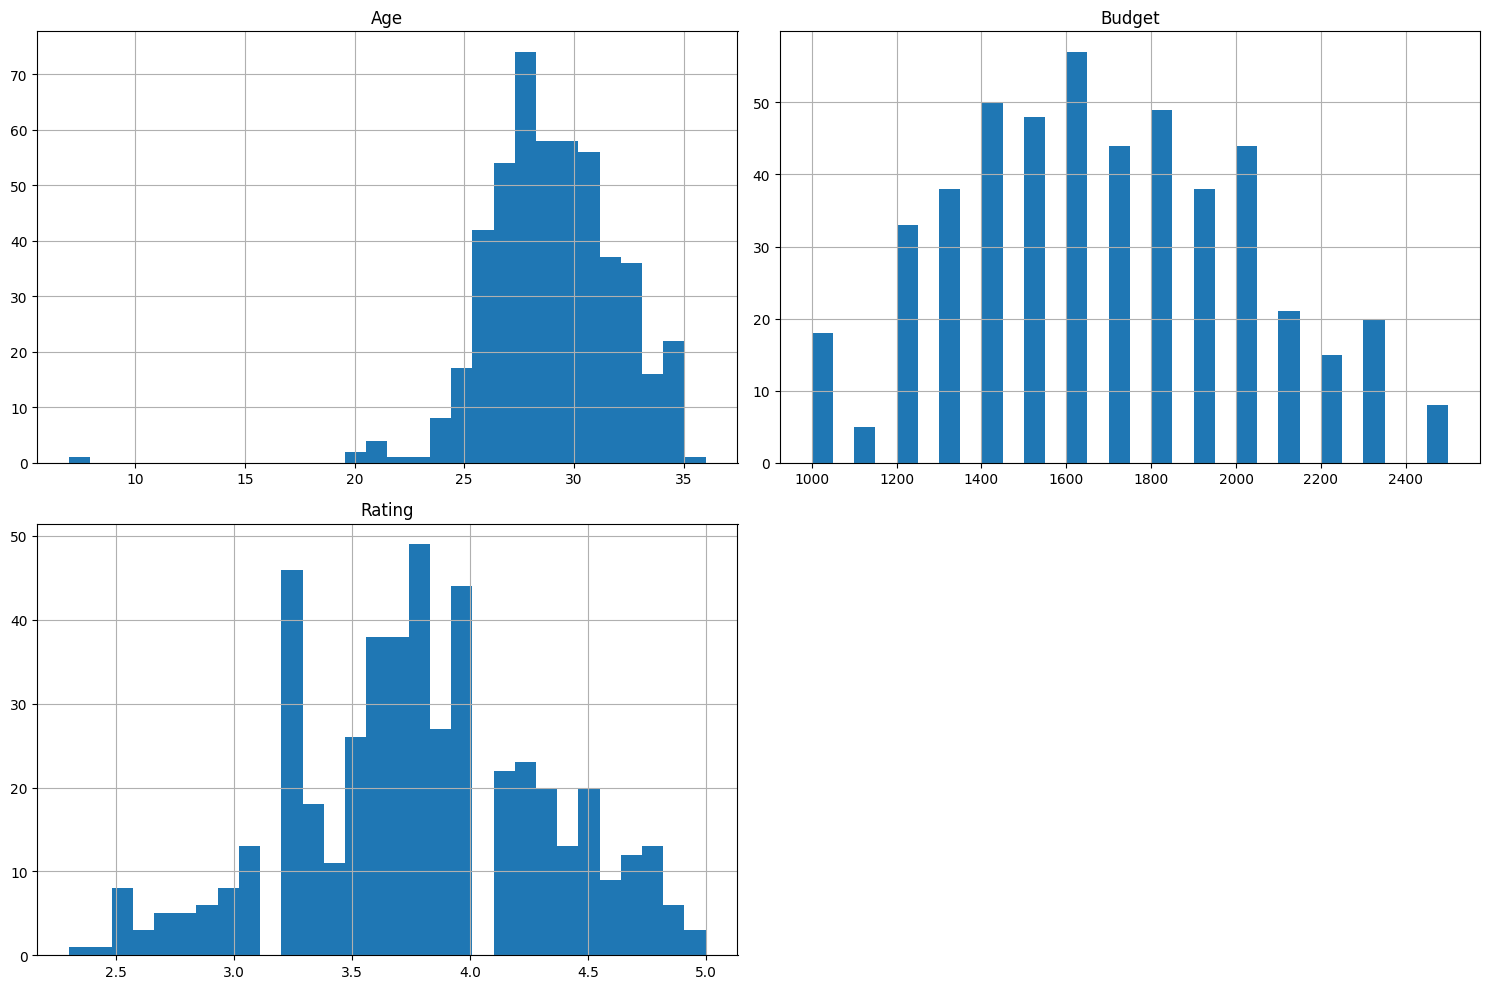

In [ ]:
num_cols = ['Age', 'Budget',  'Rating']
df[num_cols].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

df = pd.read_excel("ai_travel_dataset.xlsx")

# Impute missing values before encoding and model training
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Interest_1'] = df['Interest_1'].fillna(df['Interest_1'].mode()[0])
df['Interest_2'] = df['Interest_2'].fillna(df['Interest_2'].mode()[0])
df['Spot'] = df['Spot'].fillna(df['Spot'].mode()[0])
df['State'] = df['State'].fillna(df['State'].mode()[0])
df['Budget'] = df['Budget'].fillna(df['Budget'].median())
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

encoders = {}
for col in ['Gender','Interest_1','Interest_2','Spot','State']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [ ]:
X = df.drop("Budget", axis=1)
y = df["Budget"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

# Re-load df to ensure it's available
df = pd.read_excel("ai_travel_dataset.xlsx")

# Impute missing values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Interest_1'] = df['Interest_1'].fillna(df['Interest_1'].mode()[0])
df['Interest_2'] = df['Interest_2'].fillna(df['Interest_2'].mode()[0])
df['Spot'] = df['Spot'].fillna(df['Spot'].mode()[0])
df['State'] = df['State'].fillna(df['State'].mode()[0])
df['Budget'] = df['Budget'].fillna(df['Budget'].median())
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# Encode categorical variables
encoders = {}
for col in ['Gender','Interest_1','Interest_2','Spot','State']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Define X, y, split data, train model
X = df.drop("Budget", axis=1)
y = df["Budget"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "model2.pkl")

['model2.pkl']